In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
img = cv2.imread('cat.jpg')

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [5]:
sobel_x = cv2.filter2D(gray, -1, kernel_x)
sobel_y = cv2.filter2D(gray, -1, kernel_y)
sobel = sobel_x + sobel_y

In [6]:
dst = cv2.cornerMinEigenVal(sobel, 2, 3)

In [7]:
cv2.normalize(dst, dst, 0, 255, cv2.NORM_MINMAX)

array([[5.7291742e-03, 5.7291742e-03, 4.1369498e-03, ..., 3.2031924e-01,
        2.8821994e-02, 2.6140800e-02],
       [5.7291742e-03, 5.7291742e-03, 4.1369498e-03, ..., 3.2031924e-01,
        2.8821994e-02, 2.6140800e-02],
       [8.1320465e-02, 8.1320465e-02, 1.7864669e-02, ..., 5.8765984e-01,
        1.3672081e-02, 1.7816199e-02],
       ...,
       [8.0440558e-02, 8.0440558e-02, 3.0159864e-01, ..., 4.8875436e-03,
        2.1989521e-02, 1.8189055e-03],
       [1.0266371e-02, 1.0266371e-02, 1.9301204e-02, ..., 1.3951163e-02,
        1.7915512e-02, 7.0347404e-04],
       [7.0598879e-04, 7.0598879e-04, 1.3566554e-03, ..., 8.1402296e-03,
        1.3247335e-02, 1.0993521e-08]], dtype=float32)

In [8]:
threshold = 0.05 * dst.max()

In [9]:
corner_img = np.zeros_like(sobel)
corner_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
for i in range(dst.shape[0]):
    for j in range(dst.shape[1]):
        if dst[i, j] > threshold:
            cv2.circle(corner_img, (j, i), 5, (255, 255, 0), 2)

In [11]:
cv2.imwrite('Detected_corner.jpg', corner_img)

True

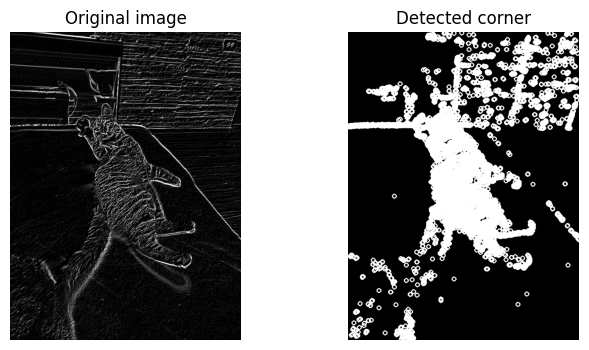

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(sobel, cmap=plt.cm.gray)
ax1.set_title('Original image')

# Rescale histogram for better display
# hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(corner_img, cmap=plt.cm.gray)
ax2.set_title('Detected corner')
plt.show()

In [15]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure

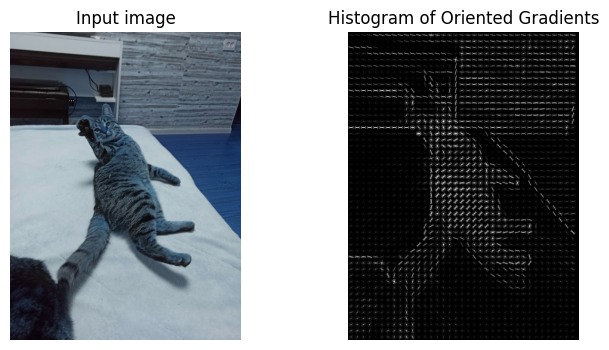

In [16]:
image = cv2.imread('cat.jpg')

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from sklearn.model_selection import train_test_split
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()



In [25]:
def extract_features_hog(X):
    features = []
    for img in X:
        fd = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, channel_axis=2)
        features.append(fd)
    return np.array(features)


In [26]:
X_train_features = extract_features_hog(X_train)
X_test_features = extract_features_hog(X_test)

In [27]:
# Створення SVM моделі та навчання на тренувальних даних
clf = svm.SVC(kernel='linear')
clf.fit(X_train_features, y_train)


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [28]:
# Застосування моделі для класифікації тестових даних та обчислення показників точності
y_pred = clf.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


Accuracy: 0.5409
Precision: 0.538567550493931
Recall: 0.5409
F1-score: 0.5385575517935136


------------

In [ ]:
def extract_features_sift(X):
    features = np.empty((len(X), 128))
    sift = cv2.SIFT_create()
    for i, img in enumerate(X):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        kp, des = sift.detectAndCompute(gray, None)
        if des is not None:
            features[i] = des.flatten()[:128]
    return features

# Вилучення характеристик методом SIFT та навчання SVM моделі
X_train_sift = extract_features_sift(X_train)
X_test_sift = extract_features_sift(X_test)
clf_sift = svm.SVC(kernel='linear')
clf_sift.fit(X_train_sift, y_train)

# Застосування моделі для класифікації тестових даних та обчислення показників точності
y_pred_sift = clf_sift.predict(X_test_sift)
accuracy_sift = accuracy_score(y_test, y_pred_sift)
precision_sift = precision_score(y_test, y_pred_sift, average='weighted')
recall_sift = recall_score(y_test, y_pred_sift, average='weighted')
f1_sift = f1_score(y_test, y_pred_sift, average='weighted')
print('Accuracy (SIFT):', accuracy_sift)
print('Precision (SIFT):', precision_sift)
print('Recall (SIFT):', recall_sift)
print('F1-score (SIFT):', f1_sift)


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Accuracy (HOG):', accuracy)
print('Accuracy (SIFT):', accuracy_sift)